##Tensorflow를 이용한 AND gate 이해하기

In [2]:
#import tensorflow as tf 
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import numpy as np 
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
tf.__version__

'2.2.0'

In [5]:
x_data = [[0, 0],
          [0, 1],          
          [1, 0],          
          [1, 1]]
# AND-gate 
y_data = [[0],          
          [0],          
          [0],          
          [1]]
x_data = np.array(x_data, dtype=np.float32) 
y_data = np.array(y_data, dtype=np.float32)

 

In [6]:
X = tf.placeholder(tf.float32, [None, 2]) 
Y = tf.placeholder(tf.float32, [None, 1])


In [7]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight') 
b = tf.Variable(tf.random_normal([1]), name='bias') 
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [8]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [9]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [10]:
sess = tf.Session()

In [11]:
sess.run(tf.global_variables_initializer())

In [12]:
vcost =[]

In [13]:
for step in range(10001):
 
    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})    
    vcost.append(cost1)    
    if step %1000 ==0:        
      print(cost1)

0.8335827
0.5399156
0.39802396
0.3202633
0.27100864
0.236301
0.21007645
0.18933542
0.17241016
0.15828267
0.1462856


Text(0.5, 0, 'epoch')

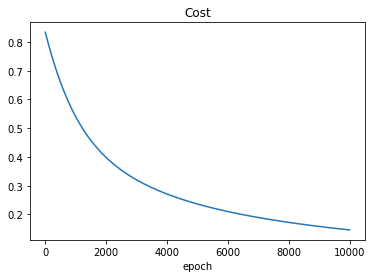

In [14]:
plt.plot(vcost) 
plt.title('Cost') 
plt.xlabel('epoch')
